# KNN Classifier for Injection Molding of Bins using tsfresh data

In [1]:
import pandas as pd
import numpy as np
import my_preprocessing_functions as mpf
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
from pprint import pp
import os

In [2]:
filename = 'processed_data_pv_0.1.csv'
data_path = os.getcwd() + "/BalanceData/"
dataset_df = pd.read_csv(data_path + filename)

In [3]:
dataset_df = pd.read_csv(data_path + filename)
features = dataset_df.drop("valid_or_not", axis=1)
labels = dataset_df["valid_or_not"]
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, test_size=0.2)

In [4]:
print('For the training set,')
mpf.check_imbalance(y_train)
print('\nFor the test set,')
mpf.check_imbalance(y_test)

For the training set,
The imbalance profile has:
 49.02% of valid products and     
 50.98% of invalid products

For the test set,
The imbalance profile has:
 53.94% of valid products and     
 46.06% of invalid products


In [5]:
def knn_train_evaluator(Xtrain, ytrain, Xtest, ytest) -> tuple:
    model_knn = KNeighborsClassifier()
    model_knn.fit(Xtrain, ytrain)
    mean_accuracy = model_knn.score(Xtest, ytest) * 100
    y_predicted = model_knn.predict(Xtest)
    return (mean_accuracy, y_predicted)

In [6]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [7]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [8]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))
# best_number_of_neighbors (bnn)
bnn = grid_search.best_params_["n_neighbors"]

{'n_neighbors': 28}
Accuracy for our training dataset with tuning is : 78.07%


In [9]:
best_knn = KNeighborsClassifier(n_neighbors=bnn)
knn.fit(X_test, y_test)
best_accuracy, best_predictions = knn_train_evaluator(X_train, y_train, X_test, y_test)
cm_best = confusion_matrix(y_test, best_predictions)
# y_test_hat = knn.predict(X_test)
# test_accuracy = accuracy_score(y_test,y_test_hat)*100
# print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

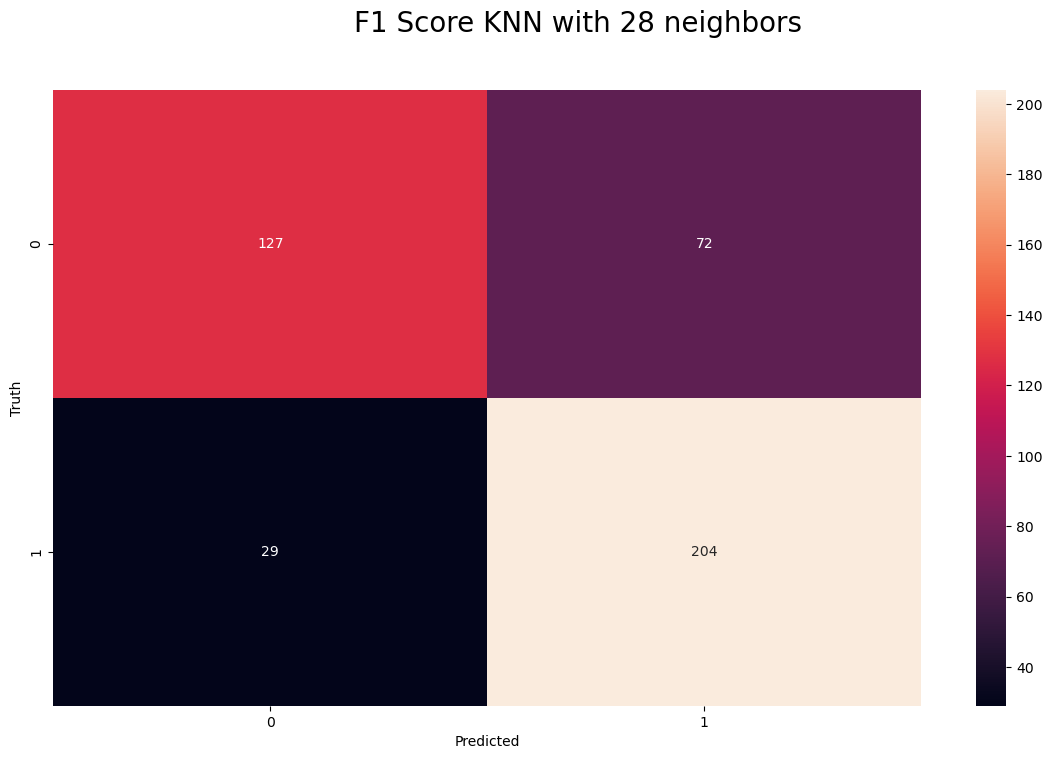

In [10]:
fig_best_knn = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
title = "F1 Score KNN with " + str(bnn) + " neighbors"
fig_best_knn.suptitle(title, fontsize=fs)
sn.heatmap(cm_best, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [11]:
best_precisions = precision_score(y_test, best_predictions, average=None)
best_recalls = recall_score(y_test, best_predictions, average=None)
best_f1_scores = f1_score(y_test, best_predictions, average=None)

In [12]:
print(f"The best precission for the not valid and valid classes are \
          respectively {best_precisions[0]:.2f} and {best_precisions[1]:.2f}")
print(f"The best recall for the not valid and valid classes are \
    respectively {best_recalls[0]:.2f} and {best_recalls[1]:.2f}")
print(f"The best f1 scores for the not valid and valid classes are \
    respectively {best_f1_scores[0]:.2f} and {best_f1_scores[1]:.2f}")

The best precission for the not valid and valid classes are           respectively 0.81 and 0.74
The best recall for the not valid and valid classes are     respectively 0.64 and 0.88
The best f1 scores for the not valid and valid classes are     respectively 0.72 and 0.80
